In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GS-1316\AppData\Roaming\nltk_data...


True

In [ ]:
def splitTextToQuintuplet(string):
    words = string.split()
    grouped_words = [' '.join(words[i: i + 5]) for i in range(0, len(words), 5)]
    return grouped_words

In [41]:
def predict_sentiment(text):
    phrases = splitTextToQuintuplet(text)
    sentiment_data = []

    for phrase in phrases:
        print (phrase)
        sid = SentimentIntensityAnalyzer()
        nlp = spacy.load("en_core_web_sm")
        doc = nlp(phrase)
        entities = []
        # print (doc.ents)
        for entity in doc.ents:
            entities.append(entity.text)
        sentiment_scores = sid.polarity_scores(phrase)
        print (sentiment_scores)
        sentiment_scores["entities"] = entities

        threshold_positive = 0.7
        threshold_negative = 0.3

        if sentiment_scores.get("compound", 0) >= threshold_positive:
            sentiment = "Positive"
            sentiment_color = "#03fc1c"
            sentiment_size = "15px"
            sentiment_weight = "normal"
        elif sentiment_scores.get("compound", 0) <= threshold_negative:
            sentiment = "Negative"
            sentiment_color = "#ff050d"
            sentiment_size = "15px"
            sentiment_weight = "bold"
        else:
            sentiment = "Neutral"
            sentiment_color = "#f2f8fc"
            sentiment_size = "15px"
            sentiment_weight = "normal"

        confidence_score = sentiment_scores.get("compound", 0) * 100
        confidence_score = round(confidence_score, 2)

        sentiment_data.append([phrase, sentiment, confidence_score])

    df = pd.DataFrame(sentiment_data, columns=["Text", "Sentiment", "Confidence Score"])
    df.plot(x="Text", y="Confidence Score", kind="bar")

I am feeling great today!
{'neg': 0.0, 'neu': 0.253, 'pos': 0.747, 'compound': 0.7088}


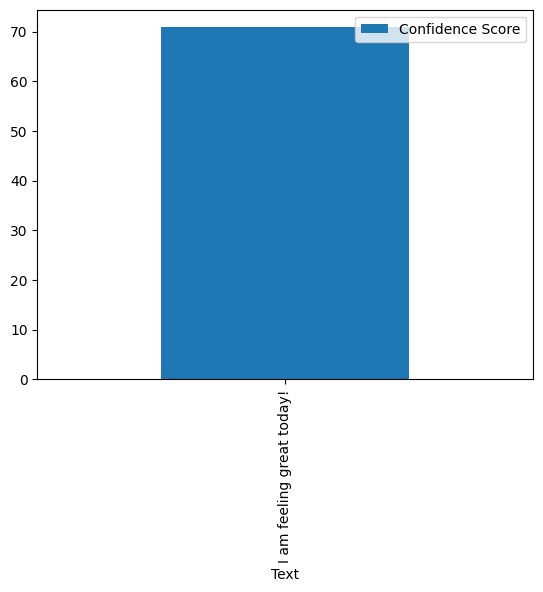

In [43]:
predict_sentiment("I am feeling great today!")

I am feeling pathetic today!
{'neg': 0.533, 'neu': 0.267, 'pos': 0.2, 'compound': -0.5411}


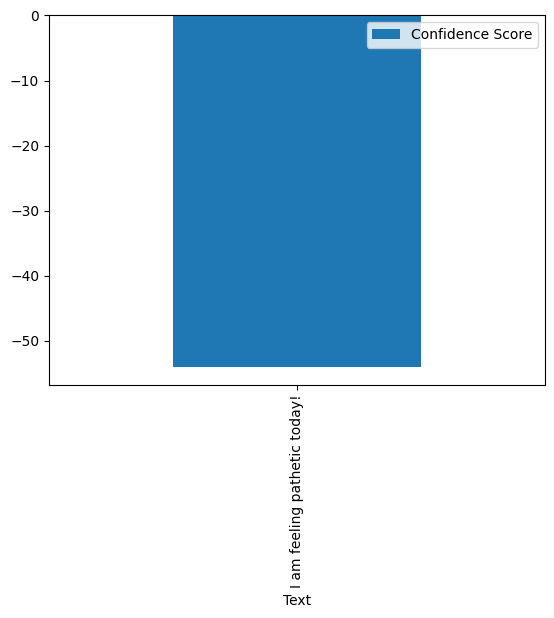

In [44]:
predict_sentiment("I am feeling pathetic today!")

I am feeling OK today!
{'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'compound': 0.5754}


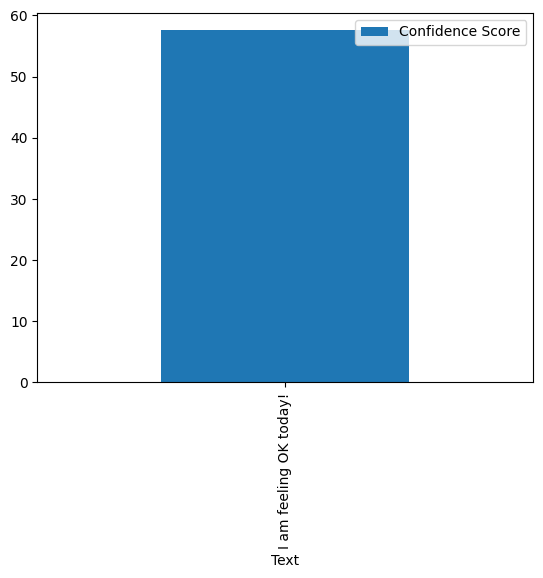

In [45]:
predict_sentiment("I am feeling OK today!")

It's a wonderful day today.
{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}
The sun is shining, and
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
the birds are chirping. I
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
got to catch up with
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
an old friend over coffee.
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4939}
Moreover, I received the promotion
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
at work! Later in the
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
day, I had a delightful
{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}
dinner with my family.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


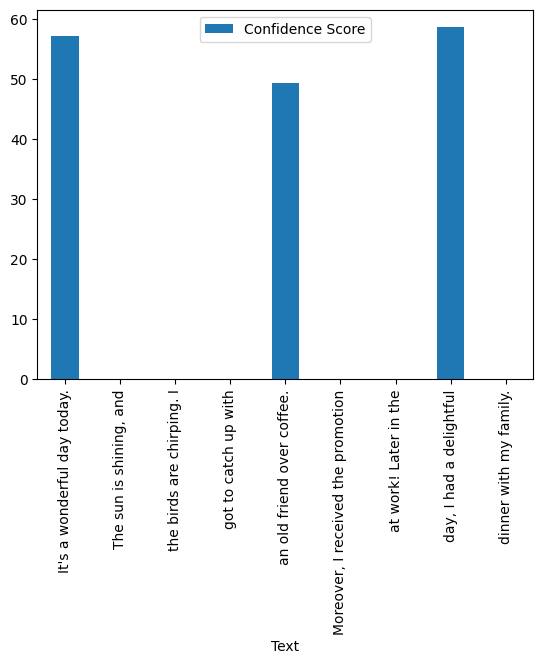

In [46]:
predict_sentiment("It's a wonderful day today. The sun is shining, and the birds are chirping. I got to catch up with an old friend over coffee. Moreover, I received the promotion at work! Later in the day, I had a delightful dinner with my family.")

In [32]:
splitTextToQuintuplet("It's a wonderful day today. The sun is shining, and the birds are chirping. I got to catch up with an old friend over coffee. Moreover, I received the promotion at work! Later in the day, I had a delightful dinner with my family.")

["It's a wonderful day today.",
 'The sun is shining, and',
 'the birds are chirping. I',
 'got to catch up with',
 'an old friend over coffee.',
 'Moreover, I received the promotion',
 'at work! Later in the',
 'day, I had a delightful',
 'dinner with my family.']